# Iris Species Classification with Scikit-learn: A Comparative Performance Analysis of Logistic Regression, Decision Trees, SVM, and KNN Models

In [26]:
# pip install scikit-learn

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [29]:
print("First 5 rows of features (X):")
print(X.head())
print("\nShape of X:", X.shape)
print("\n---")

print("Target variable distribution (y):")
print(y.value_counts())
print("\nShape of y:", y.shape)
print("\n---")

print("Descriptive statistics of X:")
print(X.describe())
print("\n---")

print("Missing values in X:")
print(X.isnull().sum())
print("\n---")

First 5 rows of features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Shape of X: (150, 4)

---
Target variable distribution (y):
0    50
1    50
2    50
Name: count, dtype: int64

Shape of y: (150,)

---
Descriptive statistics of X:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000

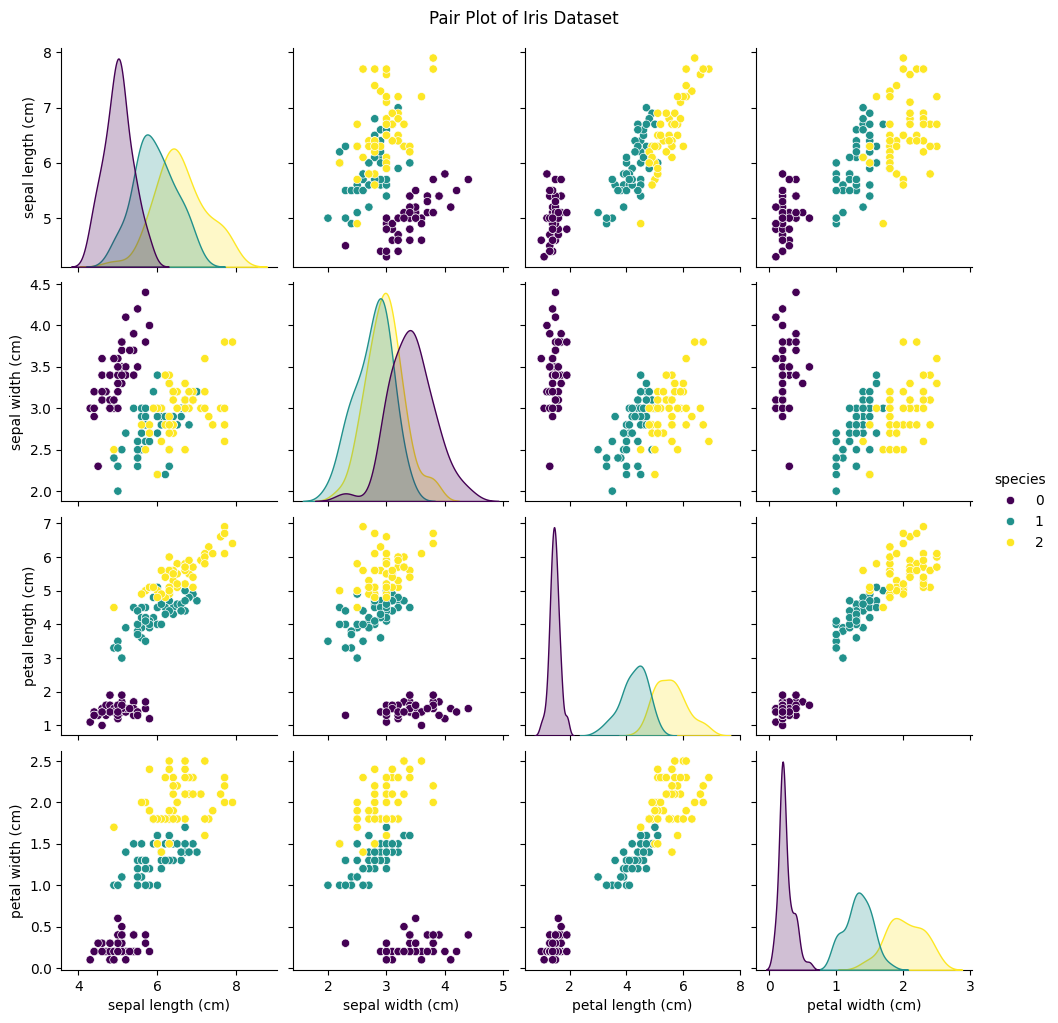

In [30]:
# Pairplot to visualize relationships
sns.pairplot(pd.concat([X, y.rename("species")], axis=1), hue="species", palette="viridis")
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

In [31]:
# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Dictionary to store test accuracies of tuned models
model_accuracies = {}

In [33]:
# --- Logistic Regression ---
print("--- Training Logistic Regression ---")
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(random_state=42, multi_class='ovr'),
                            log_reg_params, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train_scaled, y_train)

best_log_reg = grid_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
model_accuracies['Logistic Regression'] = accuracy_log_reg

print(f"Best Parameters (LogReg): {grid_log_reg.best_params_}")
print(f"Test Accuracy (LogReg): {accuracy_log_reg:.4f}")
print(classification_report(y_test, y_pred_log_reg, target_names=iris.target_names))
print("-" * 40)

--- Training Logistic Regression ---
Best Parameters (LogReg): {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy (LogReg): 0.8667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.80      0.80      0.80        15
   virginica       0.80      0.80      0.80        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45

----------------------------------------


In [34]:
# --- Decision Tree Classifier ---
print("--- Training Decision Tree ---")

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
model_accuracies['Decision Tree'] = accuracy_dt

print(f"Best Parameters (DT): {grid_dt.best_params_}")
print(f"Test Accuracy (DT): {accuracy_dt:.4f}")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))
print("-" * 40)

--- Training Decision Tree ---
Best Parameters (DT): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test Accuracy (DT): 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

----------------------------------------


In [35]:
# --- Support Vector Machine (SVM) ---
print("--- Training SVM ---")
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(SVC(random_state=42, probability=True), svm_params, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)

best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
model_accuracies['SVM'] = accuracy_svm

print(f"Best Parameters (SVM): {grid_svm.best_params_}")
print(f"Test Accuracy (SVM): {accuracy_svm:.4f}")
print(classification_report(y_test, y_pred_svm, target_names=iris.target_names))
print("-" * 40)

--- Training SVM ---
Best Parameters (SVM): {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy (SVM): 0.9111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

----------------------------------------


In [36]:
# --- K-Nearest Neighbors (KNN) ---
print("--- Training KNN ---")
knn_params = {'n_neighbors': np.arange(1, 16)}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
model_accuracies['KNN'] = accuracy_knn

print(f"Best Parameters (KNN): {grid_knn.best_params_}")
print(f"Test Accuracy (KNN): {accuracy_knn:.4f}")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))
print("-" * 40)

--- Training KNN ---
Best Parameters (KNN): {'n_neighbors': np.int64(14)}
Test Accuracy (KNN): 0.9556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

----------------------------------------


--- Model Performance Comparison ---
                 Model  Test Accuracy
3                  KNN       0.955556
1        Decision Tree       0.933333
2                  SVM       0.911111
0  Logistic Regression       0.866667


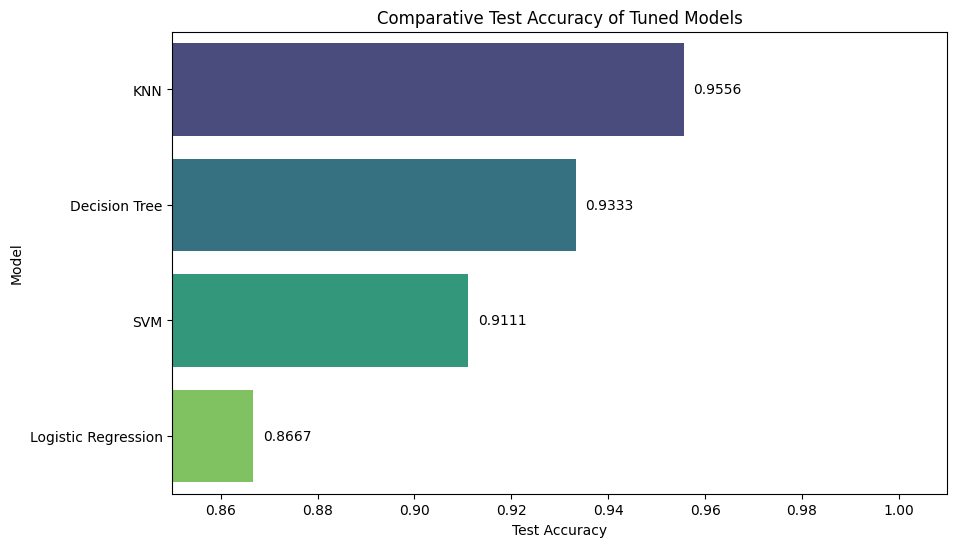

In [37]:
print("--- Model Performance Comparison ---")

# Create a DataFrame from the accuracies dictionary
results_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Test Accuracy'])
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)

print(results_df)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Test Accuracy', y='Model', data=results_df, palette='viridis')
plt.xlabel('Test Accuracy')
plt.ylabel('Model')
plt.title('Comparative Test Accuracy of Tuned Models')
plt.xlim(0.85, 1.01)
for i, v in enumerate(results_df['Test Accuracy']):
    plt.text(v + 0.002, i, f"{v:.4f}", color='black', va='center')
plt.show()